In [1]:
import torch
import echotorch
import echotorch.nn.reservoir as etrs
import echotorch.utils.matrix_generation as mg
from torch.autograd import Variable
from torch.utils.data.dataloader import DataLoader
import numpy as np
import matplotlib.pyplot as plt

# My dataset
from PhyreDataset import PhyreSequentialDataset

In [2]:
# Loading data
train_dataset, test_dataset = PhyreSequentialDataset.train_test_split('data', 0.2)

train_test_split response: test fraction rounded to 0.19985639061752034 (835 simulations)


In [3]:
# Checking if what loaded is indeed what we need
print('input: ', train_dataset.__getitem__(0)[0])
print('output: ', train_dataset.__getitem__(0)[1])

input:  tensor([[0.3500, 0.2292, 0.0586, 0.7500, 0.2605, 0.1211, 0.4141, 0.7148, 0.0156,
         0.3500, 0.1086, 0.0586, 0.7500, 0.1399, 0.1211, 0.4141, 0.5942, 0.0156,
         0.3500, 0.0294, 0.0586, 0.7500, 0.0607, 0.1211, 0.4141, 0.2439, 0.0156],
        [0.3500, 0.1086, 0.0586, 0.7500, 0.1399, 0.1211, 0.4141, 0.5942, 0.0156,
         0.3500, 0.0294, 0.0586, 0.7500, 0.0607, 0.1211, 0.4141, 0.2439, 0.0156,
         0.3500, 0.0294, 0.0586, 0.7500, 0.0607, 0.1211, 0.4141, 0.0362, 0.0156],
        [0.3500, 0.0294, 0.0586, 0.7500, 0.0607, 0.1211, 0.4141, 0.2439, 0.0156,
         0.3500, 0.0294, 0.0586, 0.7500, 0.0607, 0.1211, 0.4141, 0.0362, 0.0156,
         0.3500, 0.0294, 0.0586, 0.7500, 0.0607, 0.1211, 0.4141, 0.0079, 0.0156],
        [0.3500, 0.0294, 0.0586, 0.7500, 0.0607, 0.1211, 0.4141, 0.0362, 0.0156,
         0.3500, 0.0294, 0.0586, 0.7500, 0.0607, 0.1211, 0.4141, 0.0079, 0.0156,
         0.3500, 0.0294, 0.0586, 0.7500, 0.0607, 0.1211, 0.4141, 0.0079, 0.0156],
        [0.3500,

In [4]:
# Setting up input and output dimensions for the network
input_dim = len(train_dataset.__getitem__(0)[0][0])
output_dim = len(train_dataset.__getitem__(0)[1][0])

print(input_dim, output_dim)

27 2


In [5]:
# Data loader
trainloader = DataLoader(train_dataset, batch_size=1, shuffle=False, num_workers=2)
testloader = DataLoader(test_dataset, batch_size=1, shuffle=False, num_workers=2)

trainloader

In [8]:
# Reservoir hyper-parameters <<<<<------ ASK HOW TO DEFINE THOSE AND WHAT THOSE MEAN
spectral_radius = 1.07
leaky_rate = 0.9261
reservoir_size = 1000
connectivity = 0.1954

In [9]:
# Internal matrix
w_generator = mg.NormalMatrixGenerator(
    connectivity=connectivity,
    spetral_radius=spectral_radius
)

# Input weights
win_generator = mg.NormalMatrixGenerator(
    connectivity=connectivity,
    apply_spectral_radius=False
)

# Bias vector
wbias_generator = mg.NormalMatrixGenerator(
    connectivity=connectivity,
    apply_spectral_radius=False
)

In [10]:
# Create a Leaky-integrated ESN,
# with least-square training algo.
# esn = etrs.ESN(
esn = etrs.LiESN(
    input_dim=input_dim,
    hidden_dim=reservoir_size,
    output_dim=output_dim,
    leaky_rate=leaky_rate,
    learning_algo='inv',
    w_generator=w_generator,
    win_generator=win_generator,
    wbias_generator=wbias_generator,
)

/usr/local/anaconda3/envs/phyre/lib/python3.6/site-packages/echotorch/utils/utility_functions.py:410: UserWarning: torch.eig is deprecated in favor of torch.linalg.eig and will be removed in a future PyTorch release.
torch.linalg.eig returns complex tensors of dtype cfloat or cdouble rather than real tensors mimicking complex tensors.
L, _ = torch.eig(A)
should be replaced with
L_complex = torch.linalg.eigvals(A)
and
L, V = torch.eig(A, eigenvectors=True)
should be replaced with
L_complex, V_complex = torch.linalg.eig(A) (Triggered internally at  ../aten/src/ATen/native/BatchLinearAlgebra.cpp:2894.)
  return torch.max(torch.abs(torch.eig(m)[0])).item()


In [11]:
# For each batch
i = 0
for data in trainloader:
    print('Counter: ', i)
    i+=1
    # Inputs and outputs
    inputs, targets = data

    # Transform data to Variables
    inputs, targets = Variable(inputs), Variable(targets)

    # ESN need inputs and targets
    esn(inputs, targets)

Counter:  0
Counter:  1
Counter:  2
Counter:  3
Counter:  4
Counter:  5
Counter:  6
Counter:  7
Counter:  8
Counter:  9
Counter:  10
Counter:  11
Counter:  12
Counter:  13
Counter:  14
Counter:  15
Counter:  16
Counter:  17
Counter:  18
Counter:  19
Counter:  20
Counter:  21
Counter:  22
Counter:  23
Counter:  24
Counter:  25
Counter:  26
Counter:  27
Counter:  28
Counter:  29
Counter:  30
Counter:  31
Counter:  32
Counter:  33
Counter:  34
Counter:  35
Counter:  36
Counter:  37
Counter:  38
Counter:  39
Counter:  40
Counter:  41
Counter:  42
Counter:  43
Counter:  44
Counter:  45
Counter:  46
Counter:  47
Counter:  48
Counter:  49
Counter:  50
Counter:  51
Counter:  52
Counter:  53
Counter:  54
Counter:  55
Counter:  56
Counter:  57
Counter:  58
Counter:  59
Counter:  60
Counter:  61
Counter:  62
Counter:  63
Counter:  64
Counter:  65
Counter:  66
Counter:  67
Counter:  68
Counter:  69
Counter:  70
Counter:  71
Counter:  72
Counter:  73
Counter:  74
Counter:  75
Counter:  76
Counter: 

Counter:  624
Counter:  625
Counter:  626
Counter:  627
Counter:  628
Counter:  629
Counter:  630
Counter:  631
Counter:  632
Counter:  633
Counter:  634
Counter:  635
Counter:  636
Counter:  637
Counter:  638
Counter:  639
Counter:  640
Counter:  641
Counter:  642
Counter:  643
Counter:  644
Counter:  645
Counter:  646
Counter:  647
Counter:  648
Counter:  649
Counter:  650
Counter:  651
Counter:  652
Counter:  653
Counter:  654
Counter:  655
Counter:  656
Counter:  657
Counter:  658
Counter:  659
Counter:  660
Counter:  661
Counter:  662
Counter:  663
Counter:  664
Counter:  665
Counter:  666
Counter:  667
Counter:  668
Counter:  669
Counter:  670
Counter:  671
Counter:  672
Counter:  673
Counter:  674
Counter:  675
Counter:  676
Counter:  677
Counter:  678
Counter:  679
Counter:  680
Counter:  681
Counter:  682
Counter:  683
Counter:  684
Counter:  685
Counter:  686
Counter:  687
Counter:  688
Counter:  689
Counter:  690
Counter:  691
Counter:  692
Counter:  693
Counter:  694
Counte

Counter:  1217
Counter:  1218
Counter:  1219
Counter:  1220
Counter:  1221
Counter:  1222
Counter:  1223
Counter:  1224
Counter:  1225
Counter:  1226
Counter:  1227
Counter:  1228
Counter:  1229
Counter:  1230
Counter:  1231
Counter:  1232
Counter:  1233
Counter:  1234
Counter:  1235
Counter:  1236
Counter:  1237
Counter:  1238
Counter:  1239
Counter:  1240
Counter:  1241
Counter:  1242
Counter:  1243
Counter:  1244
Counter:  1245
Counter:  1246
Counter:  1247
Counter:  1248
Counter:  1249
Counter:  1250
Counter:  1251
Counter:  1252
Counter:  1253
Counter:  1254
Counter:  1255
Counter:  1256
Counter:  1257
Counter:  1258
Counter:  1259
Counter:  1260
Counter:  1261
Counter:  1262
Counter:  1263
Counter:  1264
Counter:  1265
Counter:  1266
Counter:  1267
Counter:  1268
Counter:  1269
Counter:  1270
Counter:  1271
Counter:  1272
Counter:  1273
Counter:  1274
Counter:  1275
Counter:  1276
Counter:  1277
Counter:  1278
Counter:  1279
Counter:  1280
Counter:  1281
Counter:  1282
Counter:  

Counter:  1776
Counter:  1777
Counter:  1778
Counter:  1779
Counter:  1780
Counter:  1781
Counter:  1782
Counter:  1783
Counter:  1784
Counter:  1785
Counter:  1786
Counter:  1787
Counter:  1788
Counter:  1789
Counter:  1790
Counter:  1791
Counter:  1792
Counter:  1793
Counter:  1794
Counter:  1795
Counter:  1796
Counter:  1797
Counter:  1798
Counter:  1799
Counter:  1800
Counter:  1801
Counter:  1802
Counter:  1803
Counter:  1804
Counter:  1805
Counter:  1806
Counter:  1807
Counter:  1808
Counter:  1809
Counter:  1810
Counter:  1811
Counter:  1812
Counter:  1813
Counter:  1814
Counter:  1815
Counter:  1816
Counter:  1817
Counter:  1818
Counter:  1819
Counter:  1820
Counter:  1821
Counter:  1822
Counter:  1823
Counter:  1824
Counter:  1825
Counter:  1826
Counter:  1827
Counter:  1828
Counter:  1829
Counter:  1830
Counter:  1831
Counter:  1832
Counter:  1833
Counter:  1834
Counter:  1835
Counter:  1836
Counter:  1837
Counter:  1838
Counter:  1839
Counter:  1840
Counter:  1841
Counter:  

Counter:  2344
Counter:  2345
Counter:  2346
Counter:  2347
Counter:  2348
Counter:  2349
Counter:  2350
Counter:  2351
Counter:  2352
Counter:  2353
Counter:  2354
Counter:  2355
Counter:  2356
Counter:  2357
Counter:  2358
Counter:  2359
Counter:  2360
Counter:  2361
Counter:  2362
Counter:  2363
Counter:  2364
Counter:  2365
Counter:  2366
Counter:  2367
Counter:  2368
Counter:  2369
Counter:  2370
Counter:  2371
Counter:  2372
Counter:  2373
Counter:  2374
Counter:  2375
Counter:  2376
Counter:  2377
Counter:  2378
Counter:  2379
Counter:  2380
Counter:  2381
Counter:  2382
Counter:  2383
Counter:  2384
Counter:  2385
Counter:  2386
Counter:  2387
Counter:  2388
Counter:  2389
Counter:  2390
Counter:  2391
Counter:  2392
Counter:  2393
Counter:  2394
Counter:  2395
Counter:  2396
Counter:  2397
Counter:  2398
Counter:  2399
Counter:  2400
Counter:  2401
Counter:  2402
Counter:  2403
Counter:  2404
Counter:  2405
Counter:  2406
Counter:  2407
Counter:  2408
Counter:  2409
Counter:  

Counter:  2896
Counter:  2897
Counter:  2898
Counter:  2899
Counter:  2900
Counter:  2901
Counter:  2902
Counter:  2903
Counter:  2904
Counter:  2905
Counter:  2906
Counter:  2907
Counter:  2908
Counter:  2909
Counter:  2910
Counter:  2911
Counter:  2912
Counter:  2913
Counter:  2914
Counter:  2915
Counter:  2916
Counter:  2917
Counter:  2918
Counter:  2919
Counter:  2920
Counter:  2921
Counter:  2922
Counter:  2923
Counter:  2924
Counter:  2925
Counter:  2926
Counter:  2927
Counter:  2928
Counter:  2929
Counter:  2930
Counter:  2931
Counter:  2932
Counter:  2933
Counter:  2934
Counter:  2935
Counter:  2936
Counter:  2937
Counter:  2938
Counter:  2939
Counter:  2940
Counter:  2941
Counter:  2942
Counter:  2943
Counter:  2944
Counter:  2945
Counter:  2946
Counter:  2947
Counter:  2948
Counter:  2949
Counter:  2950
Counter:  2951
Counter:  2952
Counter:  2953
Counter:  2954
Counter:  2955
Counter:  2956
Counter:  2957
Counter:  2958
Counter:  2959
Counter:  2960
Counter:  2961
Counter:  

In [12]:
# Now we finalize the training by
# computing the output matrix Wout.
esn.finalize()

In [13]:
# Get the first sample in training set,
# and transform it to Variable.
dataiter = iter(trainloader)
train_u, train_y = dataiter.next()
train_u, train_y = Variable(train_u), Variable(train_y)

In [14]:
# Make a prediction with our trained ESN
y_predicted = esn(train_u)

In [15]:
y_predicted

tensor([[[0.5664, 0.1676],
         [0.9245, 0.1529],
         [1.2547, 0.1642],
         [1.3899, 0.1757],
         [1.5739, 0.2059],
         [1.6726, 0.1878],
         [1.6113, 0.1912],
         [1.5371, 0.1824],
         [1.5235, 0.1775],
         [1.5298, 0.1759],
         [1.5159, 0.1783],
         [1.4976, 0.1788],
         [1.4954, 0.1792],
         [1.5014, 0.1803]]])

In [16]:
# Print training MSE and NRMSE
print(u"Train MSE: {}".format(echotorch.utils.mse(y_predicted.data, train_y.data)))
print(u"Test NRMSE: {}".format(echotorch.utils.nrmse(y_predicted.data, train_y.data)))
print(u"")

Train MSE: 0.542223334312439
Test NRMSE: 3.5775813726718195



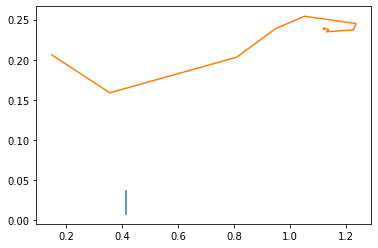

In [24]:
x_true = []
x_pred = []
y_true = []
y_pred = []

for frame in range(len(y_predicted[0])):
    x_true.append(train_y[0][frame].numpy()[0])
    y_true.append(train_y[0][frame].numpy()[1])
    x_pred.append(y_predicted[0][frame].numpy()[0])
    y_pred.append(y_predicted[0][frame].numpy()[1])
    
plt.plot(x_true, y_true, label='true')
plt.plot(x_pred, y_pred, label='pred')

In [17]:
# Get the first sample in test set,
# and transform it to Variable.
dataiter = iter(testloader)
test_u, test_y = dataiter.next()
test_u, test_y = Variable(test_u), Variable(test_y)

In [18]:
# Make a prediction with our trained ESN
y_predicted = esn(test_u)

In [19]:
# Print test MSE and NRMSE
print(u"Test MSE: {}".format(echotorch.utils.mse(y_predicted.data, test_y.data)))
print(u"Test NRMSE: {}".format(echotorch.utils.nrmse(y_predicted.data, test_y.data)))
print(u"")

Test MSE: 0.4070090353488922
Test NRMSE: 22.982170823950682



In [20]:
y_predicted[0]

tensor([[0.1478, 0.2062],
        [0.3554, 0.1589],
        [0.8085, 0.2031],
        [0.9478, 0.2388],
        [1.0509, 0.2542],
        [1.2354, 0.2450],
        [1.2266, 0.2372],
        [1.1584, 0.2356],
        [1.1296, 0.2349],
        [1.1378, 0.2375],
        [1.1259, 0.2389],
        [1.1183, 0.2393],
        [1.1214, 0.2376],
        [1.1215, 0.2387]])

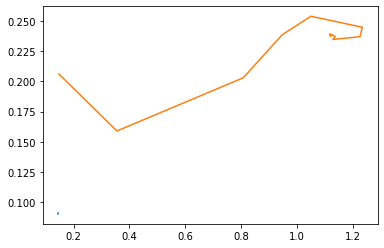

In [22]:
x_true = []
x_pred = []
y_true = []
y_pred = []

for frame in range(len(y_predicted[0])):
    x_true.append(test_y[0][frame].numpy()[0])
    y_true.append(test_y[0][frame].numpy()[1])
    x_pred.append(y_predicted[0][frame].numpy()[0])
    y_pred.append(y_predicted[0][frame].numpy()[1])
    
plt.plot(x_true, y_true, label='true')
plt.plot(x_pred, y_pred, label='pred')

In [23]:
y_true

[0.09054636,
 0.089972146,
 0.089972146,
 0.089972146,
 0.089972146,
 0.089972146,
 0.089972146,
 0.089972146,
 0.089972146,
 0.089972146,
 0.089972146,
 0.089972146,
 0.089972146,
 0.089972146]